# Data Preprocessing and Augmentation

In [1]:
import pandas as pd
from config import *
import utils
import os
import random
from data.augment import augment_data
from data.visualize import plot_samples

2025-01-20 22:23:44.117244: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 22:23:44.120289: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 22:23:44.172982: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-20 22:23:44.173022: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-20 22:23:44.174811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Exploratory Data Analysis (EDA)

In [2]:
file = random.choice(utils.listdir_abs(os.path.join(ROOT_DIR, DATA_RAW_DIR, "no_leak")))
df = pd.read_csv(file)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [3]:
print("\nDescriptive statistics: \n", df.describe())


Descriptive statistics: 
          pressure        flow
count  220.000000  220.000000
mean     0.168736    0.217641
std      0.141158    1.783737
min      0.017000    0.000000
25%      0.017000    0.000000
50%      0.246000    0.000000
75%      0.302250    0.000000
max      0.322000   20.758000


In [5]:
print("\nPairwise correlation of columns: \n", df.corr())



Pairwise correlation of columns: 
           pressure      flow
pressure  1.000000  0.019905
flow      0.019905  1.000000


In [6]:
print("\nSampling Frequency: ", df.index.to_series().diff().median())


Sampling Frequency:  0 days 00:00:01


array([[<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'flow'}>]], dtype=object)

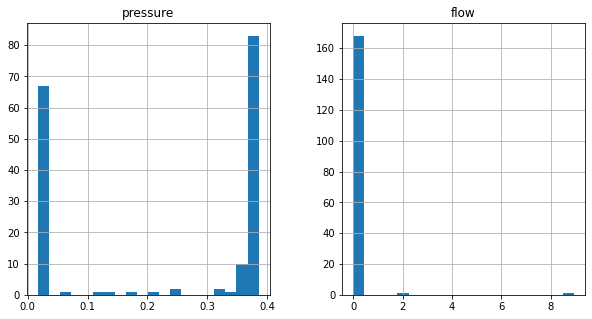

In [7]:
df[['pressure', 'flow']].hist(bins=20, figsize=(10, 5))

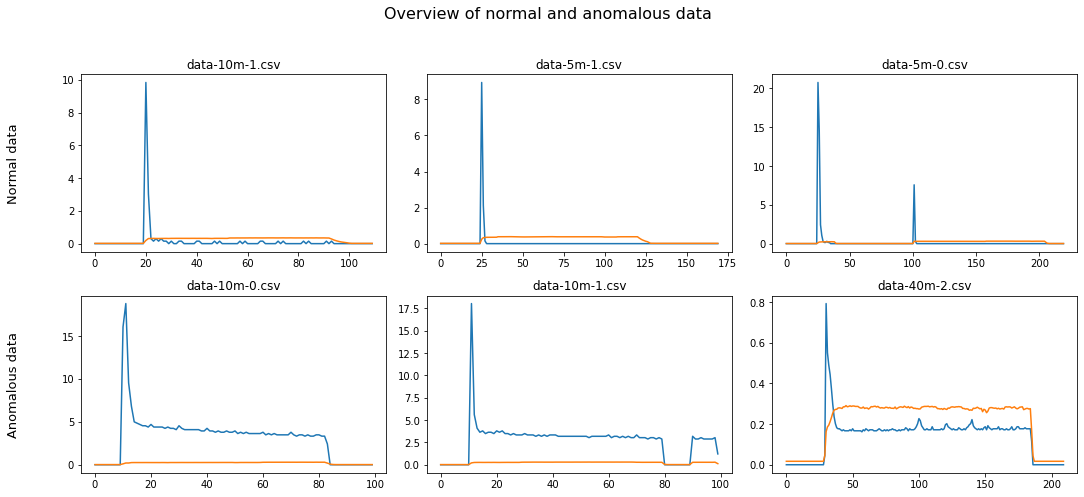

In [13]:
plot_samples(os.path.join(ROOT_DIR, DATA_RAW_DIR))

## Data Augmentation

In [21]:
augment_data(num_augmented=5, variance=0.001)

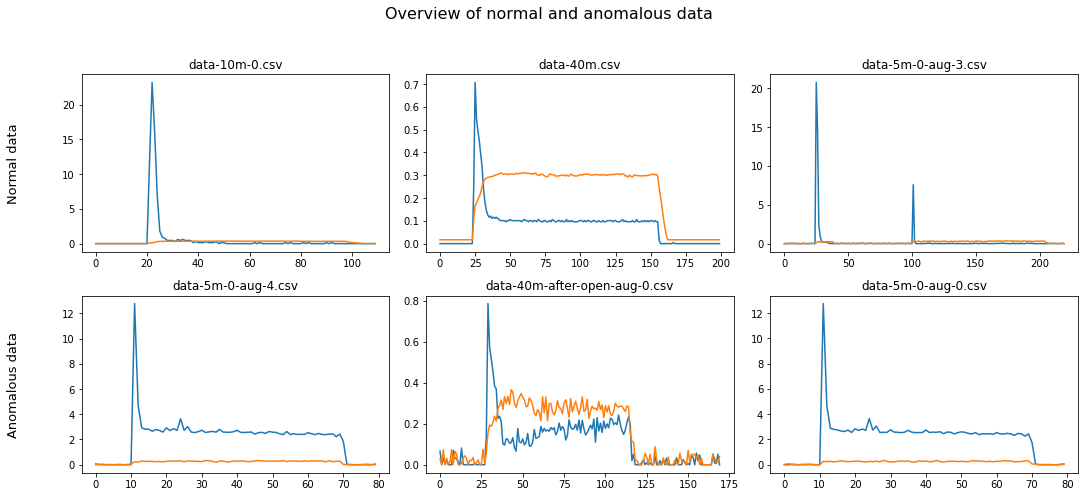

In [22]:
plot_samples(os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR))